In [19]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from cdindicatorFn import datavalue_type_filter

In [20]:
OverarchingConditions_df = pd.read_csv('Overarching Conditions.csv')

In [21]:
OverarchingConditions_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')

In [22]:
OverarchingConditions_df['DataValueUnit'].value_counts()

DataValueUnit
%                    31002
Number               16201
cases per 100,000     8118
Years                 1040
Name: count, dtype: int64

In [23]:
OverarchingConditions_df['Question'].value_counts()


Question
Premature mortality among adults aged 45-64 years                      12177
Recent physically unhealthy days among adults aged >= 18 years          8258
Fair or poor self-rated health status among adults aged >= 18 years     8145
Recent activity limitation among adults aged >= 18 years                7943
Current lack of health insurance among adults aged 18-64 years          7394
Prevalence of sufficient sleep among adults aged >= 18 years            4282
Poverty                                                                 3289
Self-rated health status among women aged 18-44 years                   2624
Current health care coverage among women aged 18-44 years               2611
High school completion among adults aged 18-24 years                    1590
Life expectancy at birth                                                 676
Gini Index of income inequality                                          530
High school completion among women aged 18-44 years                

In [24]:
OverarchingConditions_df['LocationAbbr'].value_counts()

LocationAbbr
KS    1292
OK    1283
WA    1279
MN    1279
CA    1272
MI    1272
CO    1267
AZ    1261
TX    1259
SC    1258
NY    1256
VA    1255
OH    1250
NE    1245
NC    1244
MD    1231
NV    1228
MO    1228
IN    1226
GA    1220
PA    1218
MA    1217
OR    1210
LA    1198
FL    1197
CT    1196
WI    1181
AL    1175
UT    1173
IL    1169
AR    1164
IA    1159
TN    1156
NM    1148
HI    1144
RI    1143
KY    1142
AK    1138
NJ    1120
DE    1105
DC    1064
MT    1037
MS    1025
ID     991
WY     970
WV     960
ME     960
ND     952
SD     940
NH     900
VT     861
GU     683
PR     526
US     509
VI     114
Name: count, dtype: int64

In [25]:
#This code will show me if the YearStart column and the YearEnd column are all the same or not
same_years = (OverarchingConditions_df['YearStart'] == OverarchingConditions_df['YearEnd']).all()

if same_years:
    print("The 'YearStart' and 'YearEnd' columns have the same values in all rows.")
else:
    print("The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.")

The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.


In [26]:
#need to put the YearStart in order
OverarchingConditions_df=OverarchingConditions_df.sort_values(by='YearEnd')
OverarchingConditions_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2001,2001,IN,Overarching Conditions,Life expectancy at birth,76.5,Years,Number,NaN,NaN,NaN,Overall,Overall
5220,2001,2001,MS,Overarching Conditions,Life expectancy at birth,73.9,Years,Number,NaN,NaN,NaN,Overall,Overall
5265,2001,2001,NE,Overarching Conditions,Life expectancy at age 65 years,18.6,Years,Number,NaN,NaN,NaN,Overall,Overall
1470,2001,2001,NC,Overarching Conditions,Life expectancy at birth,76.3,Years,Number,NaN,NaN,NaN,Overall,Overall
5750,2001,2001,CT,Overarching Conditions,Life expectancy at birth,78.9,Years,Number,NaN,NaN,NaN,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29362,2021,2021,IA,Overarching Conditions,Recent physically unhealthy days among adults ...,6.1,Number,Age-adjusted Mean,NaN,3.5,8.8,Race/Ethnicity,"Multiracial, non-Hispanic"
29364,2021,2021,IA,Overarching Conditions,Fair or poor self-rated health status among ad...,12.7,%,Age-adjusted Prevalence,NaN,11.5,14.1,Gender,Female
29365,2021,2021,IA,Overarching Conditions,Recent activity limitation among adults aged >...,2.0,Number,Mean,NaN,1.8,2.2,Gender,Male
29327,2021,2021,IA,Overarching Conditions,Self-rated health status among women aged 18-4...,88.8,%,Crude Prevalence,NaN,80.0,94.1,Race/Ethnicity,"Other, non-Hispanic"


In [27]:
#This would turn 'YearEnd' into a date time by year but im sure why would need to do this will investigate more
#OverarchingConditions_df['YearEnd'] = pd.to_datetime(OverarchingConditions_df['YearEnd'], format='%Y')

#This code allows us to display value counts in order by year so we can see the order of years and how many rows of data each year contains
# use this code if you convert to datetime (year_end_counts = OverarchingConditions_df['YearEnd'].dt.year.value_counts().sort_index())
year_end_counts = OverarchingConditions_df['YearEnd'].value_counts().sort_index()
year_end_counts
#data summary for years: it looks like 2007 could be considered an outlier and possibly unusable for our analysis

YearEnd
2001     104
2009     312
2010    1744
2011    3174
2012    5440
2013    6121
2014    6126
2015    5269
2016    6167
2017    5479
2018    6393
2019    5400
2020    5657
2021    3564
Name: count, dtype: int64

In [28]:
# chekcing the dtype of the column 'YearEnd', thus far int64 is our goal, but might check again if datetime becomes our targeted dtype
OverarchingConditions_df['YearEnd'].dtype


dtype('int64')

In [29]:
#need to explore what kind of data we have in the DataValue comlumn to see what we can compare and use for a graph
#footnotes should give me an idea of what the numbers mean, check against documentation for further understanding
#need to understand if the questions datavalue is infering more or lesslikley hood of chronic desease
#Questions could be something that we could compare, need to check if the datavalues are comparable for all the same Questions
#what will groupby do if i groupby question: desired result it will group all same questions together to have comparable data amongst the same questions
#I might also need to groupby year: desired result all the same question whithin a particular year grouped together so I can show yearly changes with comparable data
#The LocationAbbr includes US, which has to be addressed
#we need to seperate or group by year,question, stratificationCategory1 and then stratification1 if not Overall


OverarchingConditions_df


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2001,2001,IN,Overarching Conditions,Life expectancy at birth,76.5,Years,Number,NaN,NaN,NaN,Overall,Overall
5220,2001,2001,MS,Overarching Conditions,Life expectancy at birth,73.9,Years,Number,NaN,NaN,NaN,Overall,Overall
5265,2001,2001,NE,Overarching Conditions,Life expectancy at age 65 years,18.6,Years,Number,NaN,NaN,NaN,Overall,Overall
1470,2001,2001,NC,Overarching Conditions,Life expectancy at birth,76.3,Years,Number,NaN,NaN,NaN,Overall,Overall
5750,2001,2001,CT,Overarching Conditions,Life expectancy at birth,78.9,Years,Number,NaN,NaN,NaN,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29362,2021,2021,IA,Overarching Conditions,Recent physically unhealthy days among adults ...,6.1,Number,Age-adjusted Mean,NaN,3.5,8.8,Race/Ethnicity,"Multiracial, non-Hispanic"
29364,2021,2021,IA,Overarching Conditions,Fair or poor self-rated health status among ad...,12.7,%,Age-adjusted Prevalence,NaN,11.5,14.1,Gender,Female
29365,2021,2021,IA,Overarching Conditions,Recent activity limitation among adults aged >...,2.0,Number,Mean,NaN,1.8,2.2,Gender,Male
29327,2021,2021,IA,Overarching Conditions,Self-rated health status among women aged 18-4...,88.8,%,Crude Prevalence,NaN,80.0,94.1,Race/Ethnicity,"Other, non-Hispanic"


In [30]:
OverarchingConditions_df =OverarchingConditions_df.loc[OverarchingConditions_df['Question'] == 'Current smokeless Overarching Conditions use among adults aged >= 18 years']
OverarchingConditions_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1


In [31]:
#This groups the dataframe first by Year and then question, StratificationCat1, stratification, and finally groups by location
#It then applys a lambda function to make sure the years are in order.
#This currently does not address US in the locations with individual states
grouped_OverarchingConditions_df= OverarchingConditions_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(
    lambda x: x.sort_values(by = 'YearEnd')).reset_index(drop = True)

grouped_OverarchingConditions_df.head()

/var/folders/ys/j34f3pms18l5jc7tq2nl1qn00000gp/T/ipykernel_1275/2208681829.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_OverarchingConditions_df= OverarchingConditions_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1


In [32]:
#use this to look at a list of possible questions to choose from
grouped_OverarchingConditions_df['Question'].value_counts()

Series([], Name: count, dtype: int64)

In [33]:
#The question is can we turn this into a function to apply to other csvs???

#creates a list with all the target valus in the Questions column
questions = grouped_OverarchingConditions_df['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'] == question]\
        .loc[grouped_OverarchingConditions_df['LocationAbbr'] == 'US']\
        .loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall']





In [35]:
# #renaming all the dataframes in the dfs{} and storing them in their respective dataframes
# us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
# us_overall_quit_OverarchingConditions_df = dfs['Quit attempts in the past year among current smokers']
# us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
# us_overall_smokeless_Overarching Conditions_adult_df = dfs['Current smokeless Overarching Conditions use among adults aged >= 18 years']
# us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
# us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
# us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
# us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
# us_overall_smokeless_youth_df=dfs['Current smokeless Overarching Conditions use among youth']
# us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
# us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
# us_overall_2nd_school_Overarching Conditions_free_policy=dfs['Secondary schools that have a comprehensive Overarching Conditions-free school policy in place']
# us_overall_Overarching Conditions_revenue_fund_cdc_level = dfs['Percent Overarching Conditions revenue to fund at CDC recommended level']

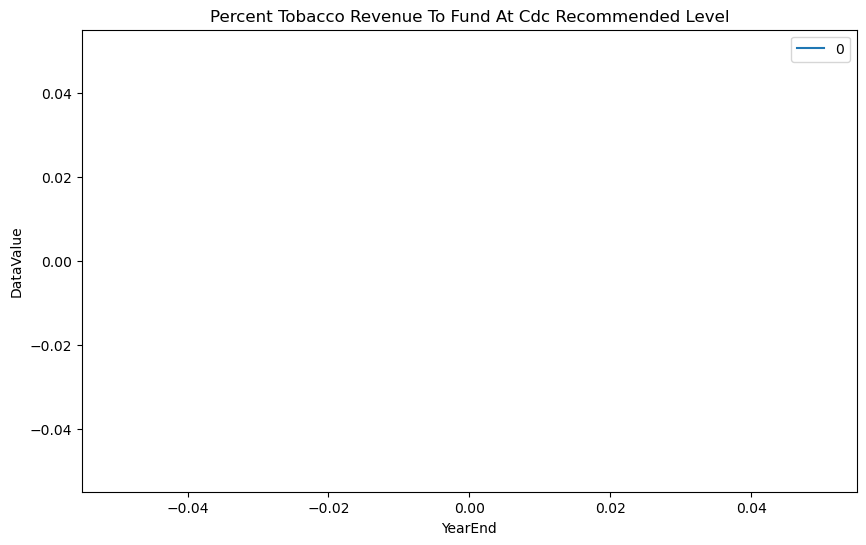

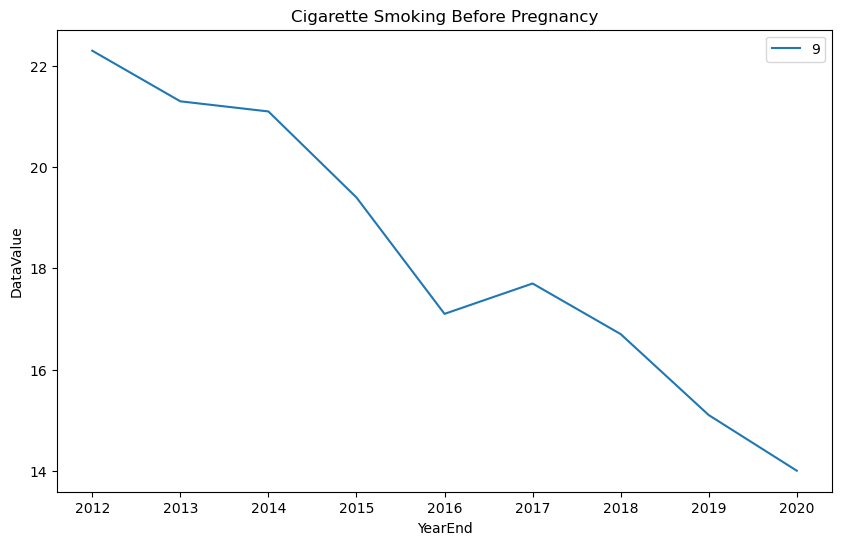

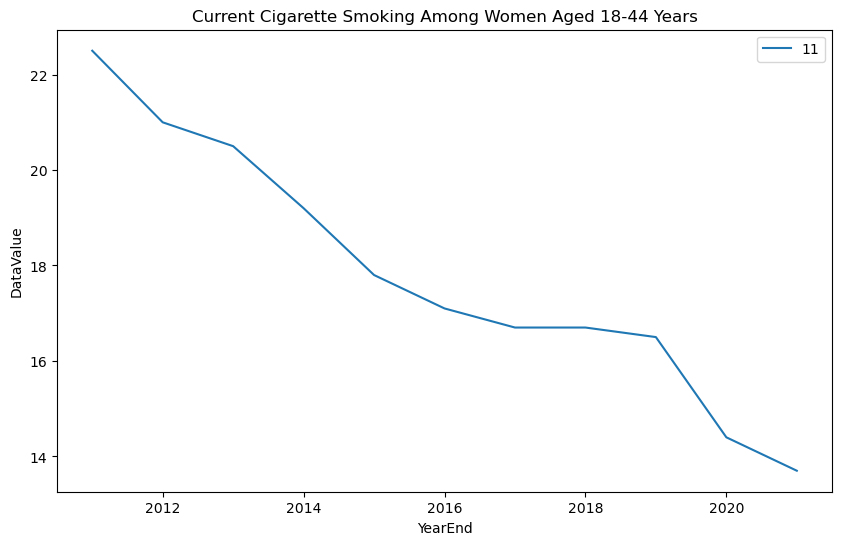

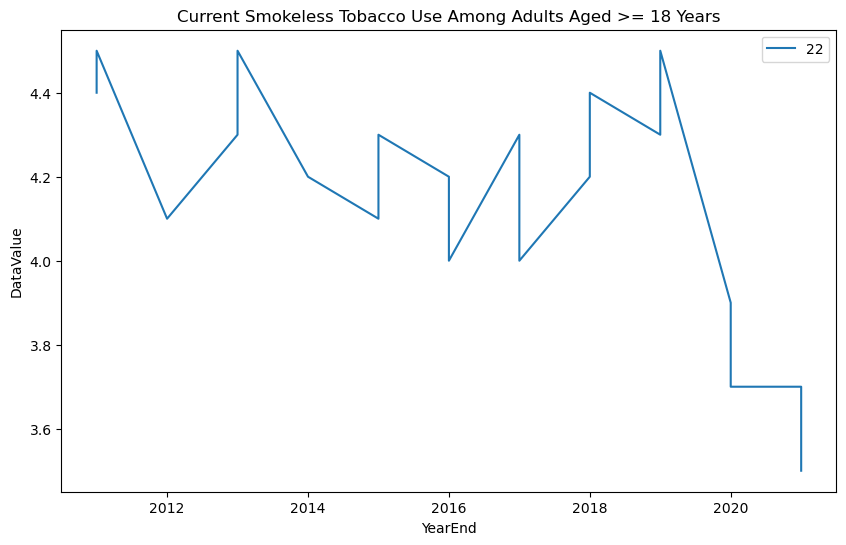

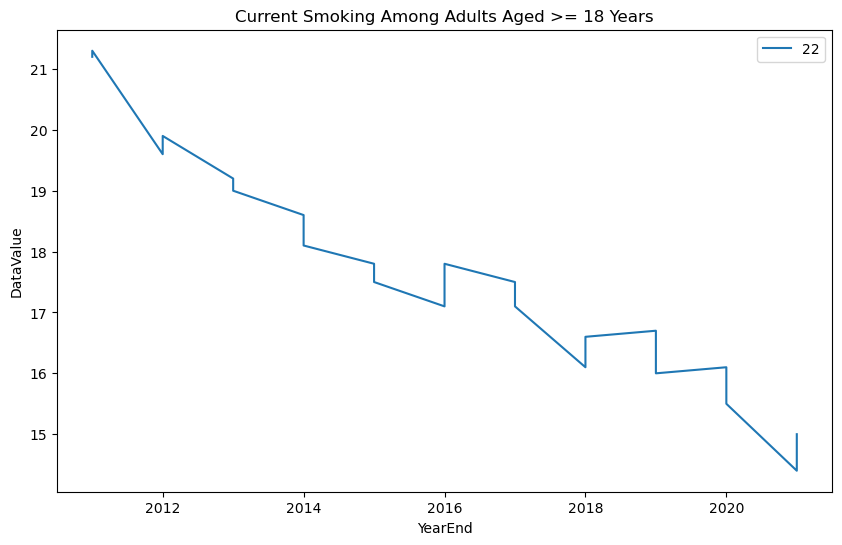

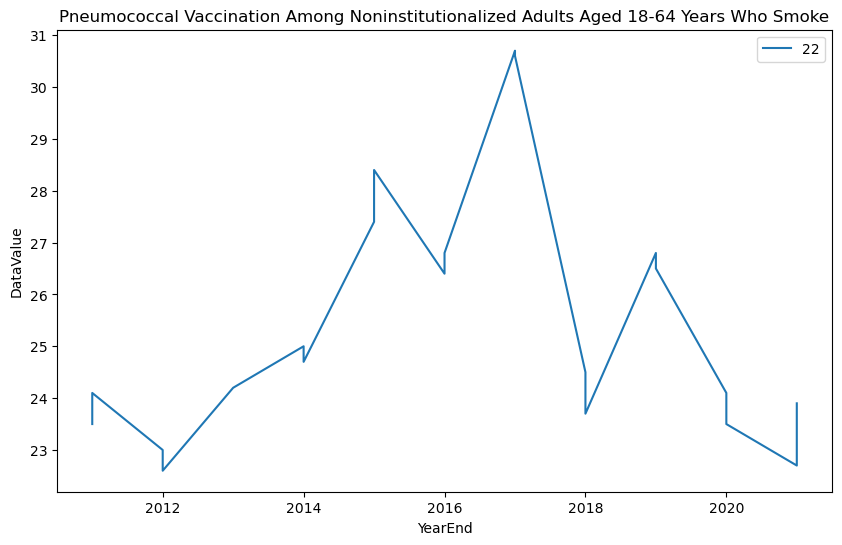

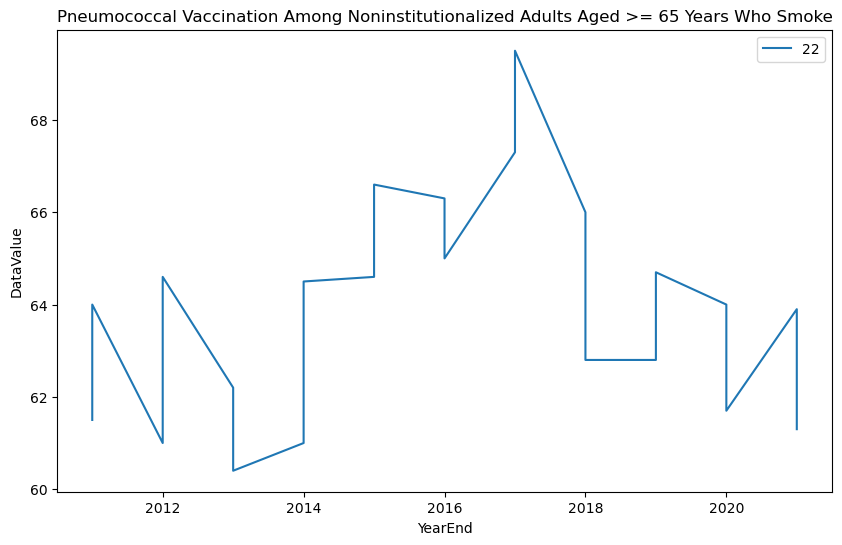

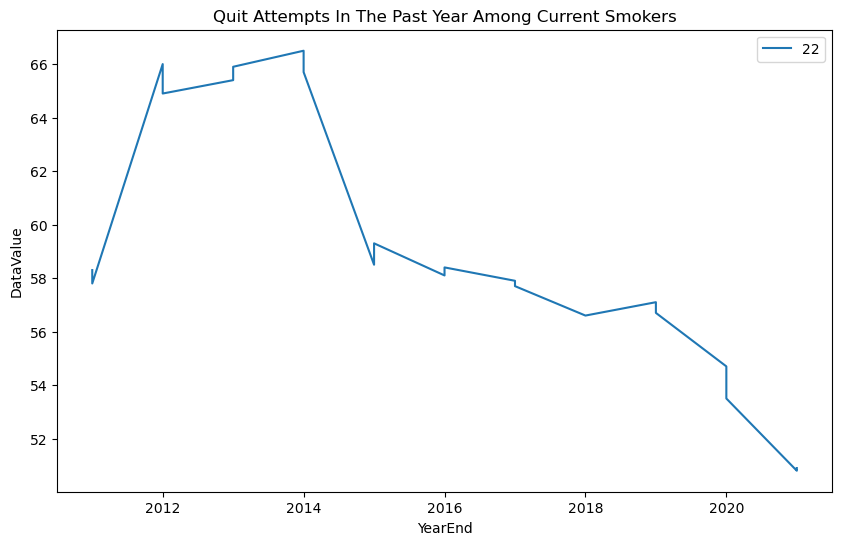

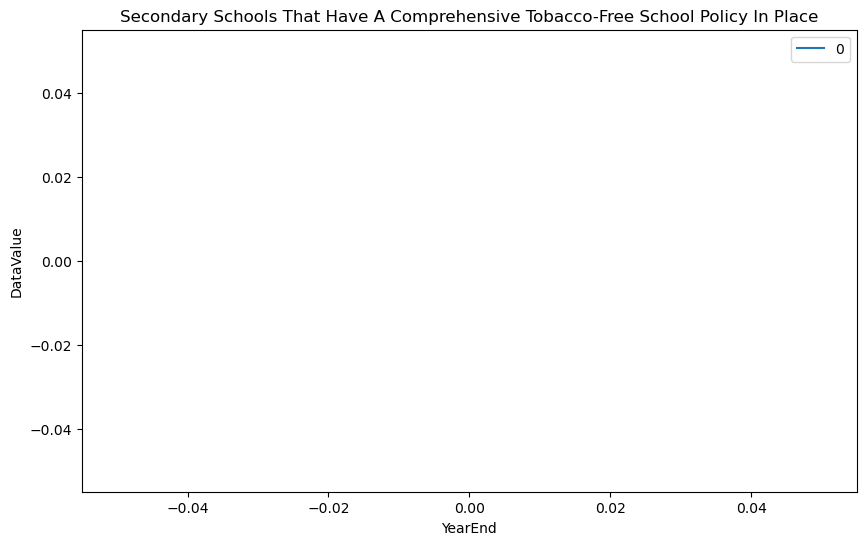

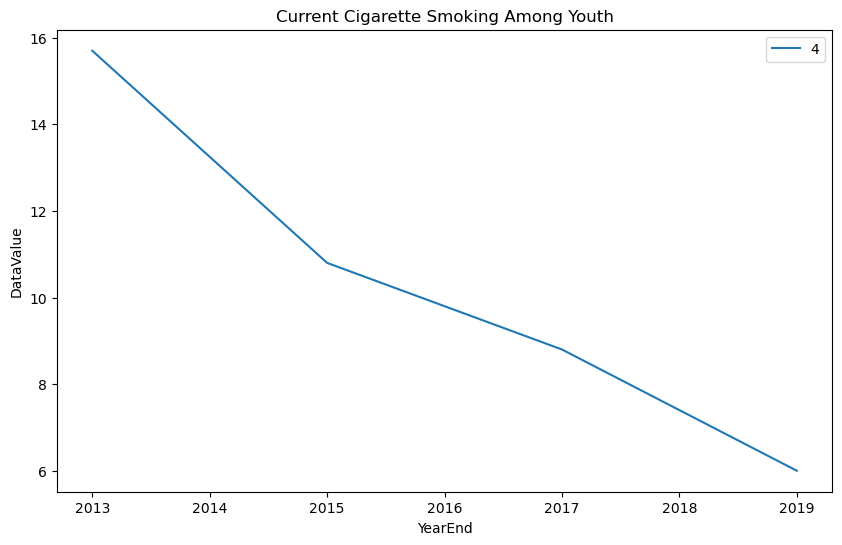

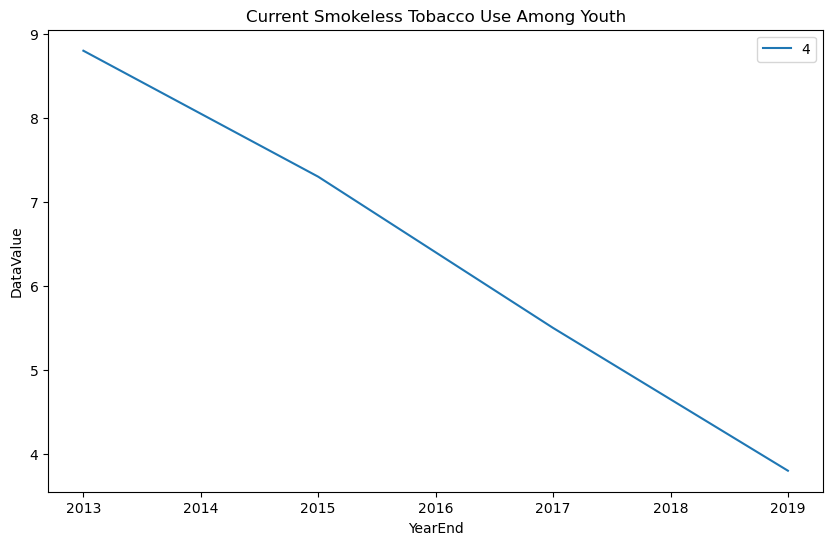

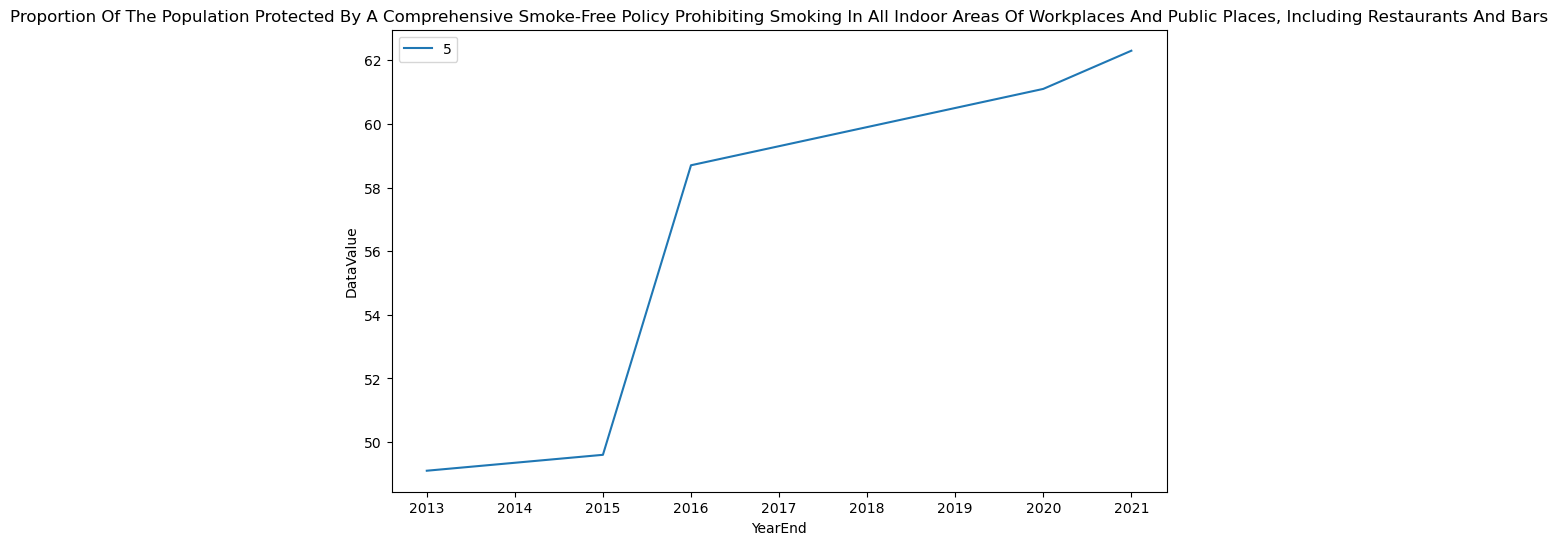

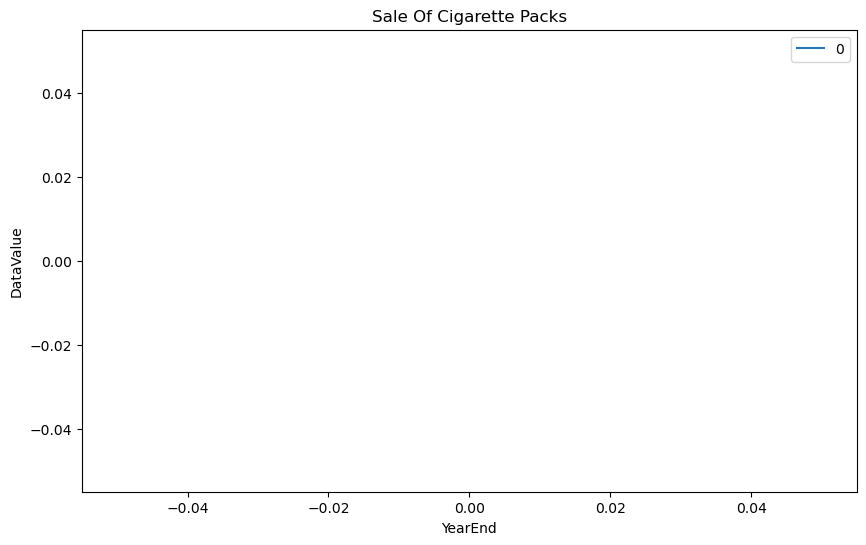

In [ ]:
#loops through the dfs dictionary to extract the individual dfs by their 'Question' name and then plot them by yearend and datavalue
for df_name, df in dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearEnd'], df['DataValue'], label=df['DataValueUnit'].count())
    plt.xlabel('YearEnd')
    plt.ylabel('DataValue')
    plt.title(df_name.replace('_', ' ').title())
    plt.legend()
    plt.show()

Results: 'Percent tobacco revenue to fund at CDC recommended level' & 'Sale of cigarette packs' & 'Secondary schools that have a comprehensive tobacco-free school policy in place' dataframes don't have US or possibly Overall data causing them to be empty

dataframes with similar datavalue units that we could possibly plot on one graph:
    us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
    us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
#The top two have ranges 14 to 22 and the bottom has 15 to 21 could possibly combine these
    us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']

#range 4 to 9
    us_overall_smokeless_youth_df=dfs['Current smokeless tobacco use among youth']
#range 6 to 16
    us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']

#range 52 to 66
    us_overall_quit_tobacco_df = dfs['Quit attempts in the past year among current smokers']
#range 60 to 68
    us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
#range 50 to 62
    us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']




In [ ]:
#renaming all the dataframes in the dfs{} and storing them in their respective dataframes
us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
us_overall_quit_OverarchingConditions_df = dfs['Quit attempts in the past year among current smokers']
us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
us_overall_smokeless_Overarching Conditions_adult_df = dfs['Current smokeless Overarching Conditions use among adults aged >= 18 years']
us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
us_overall_smokeless_youth_df=dfs['Current smokeless Overarching Conditions use among youth']
us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
us_overall_2nd_school_Overarching Conditions_free_policy=dfs['Secondary schools that have a comprehensive Overarching Conditions-free school policy in place']
us_overall_Overarching Conditions_revenue_fund_cdc_level = dfs['Percent Overarching Conditions revenue to fund at CDC recommended level']

<Axes: xlabel='YearEnd'>

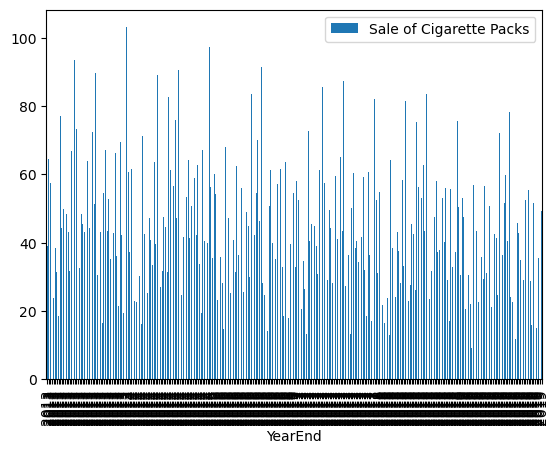

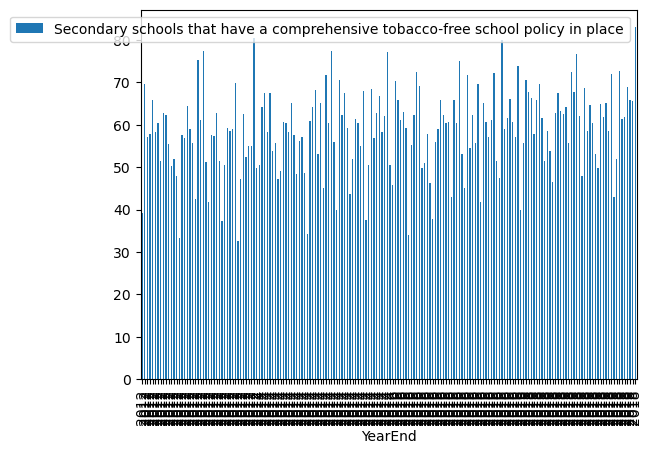

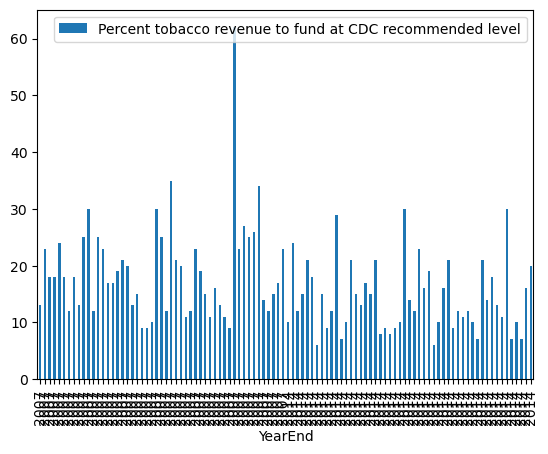

In [ ]:
#filter these by location and possibly Overall and maybe we could make a bar graph?
overall_sale_cigarette_packs_df=grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'] == 'Sale of cigarette packs']\
.loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall']

overall_2nd_school_Overarching Conditions_free_policy_df = grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'] == 'Secondary schools that have a comprehensive Overarching Conditions-free school policy in place']\
.loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall']

overall_Overarching Conditions_revenue_fund_cdc_level_df =grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'] == 'Percent Overarching Conditions revenue to fund at CDC recommended level']\
.loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall'] 

#overall_sale_cigarette_packs_df
#overall_2nd_school_Overarching Conditions_free_policy_df
#overall_Overarching Conditions_revenue_fund_cdc_level_df

overall_sale_cigarette_packs_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Sale of Cigarette Packs')
overall_2nd_school_Overarching Conditions_free_policy_df.plot(kind ='bar',x = 'YearEnd', y = "DataValue", label = 'Secondary schools that have a comprehensive Overarching Conditions-free school policy in place')
overall_Overarching Conditions_revenue_fund_cdc_level_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Percent Overarching Conditions revenue to fund at CDC recommended level')
#plt.legend()
#plt.figure(figsize=(20,10))

In [ ]:
#lets choose a question with an easy to understand and compareble data value with the location being the US and the stratification being overall
# ill start by looking at questions and datavaluess
us_overall_smokingb4pregnancy_df =grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'] == 'Cigarette smoking before pregnancy'].loc[grouped_OverarchingConditions_df['LocationAbbr'] == 'US']\
.loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall']

us_overall_quit_OverarchingConditions_df =grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'] == 'Quit attempts in the past year among current smokers'].loc[grouped_OverarchingConditions_df['LocationAbbr'] == 'US']\
.loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall']
#us_overall_smokingb4pregnancy_df
#us_overall_quit_OverarchingConditions_df.info()
#us_overall_quit_OverarchingConditions_df[['DataValue', 'DataValueUnit', 'DataValueType']]

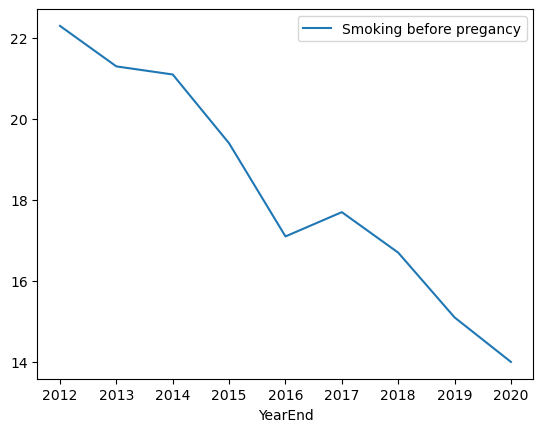

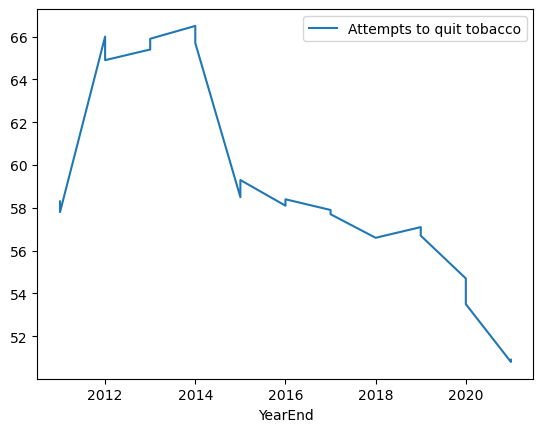

In [ ]:
us_overall_smokingb4pregnancy_df.plot(x = 'YearEnd', y = "DataValue", label = 'Smoking before pregancy')
us_overall_quit_OverarchingConditions_df.plot(x = 'YearEnd', y = "DataValue", label = 'Attempts to quit Overarching Conditions')
plt.legend()

# plt.plot(us_overall_quit_OverarchingConditions_df['YearEnd'], us_overall_quit_OverarchingConditions_df['DataValue'], label = "Attempts to quit Overarching Conditions")
# plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
# plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('Overarching Conditions')
# plt.legend()

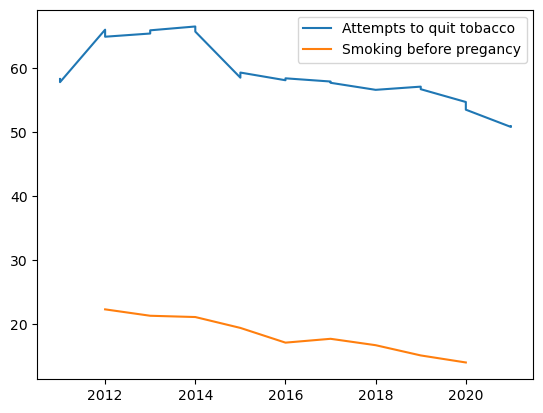

In [ ]:
plt.plot(us_overall_quit_OverarchingConditions_df['YearEnd'], us_overall_quit_OverarchingConditions_df['DataValue'], label = "Attempts to quit Overarching Conditions")
plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('Overarching Conditions')
# plt.legend()

In [ ]:
OverarchingConditions_df['Question'].value_counts()

Question
Current smoking among adults aged >= 18 years                                                                                                                                          8645
Quit attempts in the past year among current smokers                                                                                                                                   6293
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke                                                                                                  5852
Current smokeless tobacco use among adults aged >= 18 years                                                                                                                            5384
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke                                                                                                  4497
Current cigarette smoking among women aged 18-44 ye

In [ ]:
#we first filtered the dataframe to only include 2 questions as well as location = US, stratification = Overall

question_year_df =grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless Overarching Conditions use among adults aged >= 18 years'])].loc[grouped_OverarchingConditions_df['LocationAbbr'] == 'US']\
.loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall']

#put each question into its own list
# Create new columns based on the values in the 'Initial_Column'
question_year_df['Question1'] = np.where(question_year_df['Question'] =='Current smoking among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df['Question2'] = np.where(question_year_df['Question'] =='Current smokeless Overarching Conditions use among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df.head()


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Question1,Question2
594,2011,2011,US,Tobacco,Current smokeless tobacco use among adults age...,4.4,%,Crude Prevalence,50 States + DC: US Median,3.6,4.8,Overall,Overall,NaN,4.4
595,2011,2011,US,Tobacco,Current smokeless tobacco use among adults age...,4.5,%,Age-adjusted Prevalence,50 States + DC: US Median,3.7,5.0,Overall,Overall,NaN,4.5
1115,2011,2011,US,Tobacco,Current smoking among adults aged >= 18 years,21.2,%,Crude Prevalence,50 States + DC: US Median,20.0,22.4,Overall,Overall,21.2,NaN
1116,2011,2011,US,Tobacco,Current smoking among adults aged >= 18 years,21.3,%,Age-adjusted Prevalence,50 States + DC: US Median,20.3,22.5,Overall,Overall,21.3,NaN
3808,2012,2012,US,Tobacco,Current smokeless tobacco use among adults age...,4.1,%,Age-adjusted Prevalence,50 States + DC: US Median,3.9,4.7,Overall,Overall,NaN,4.1


In [ ]:
question_year_df.columns


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Question1', 'Question2'],
      dtype='object')

In [ ]:
question_year_filter = question_year_df[['YearEnd','Question1','Question2']]
#question_year_filter.set_index("YearEnd")
question_year_filter.head()

,YearEnd,Question1,Question2
594,2011,NaN,4.4
595,2011,NaN,4.5
1115,2011,21.2,NaN
1116,2011,21.3,NaN
3808,2012,NaN,4.1


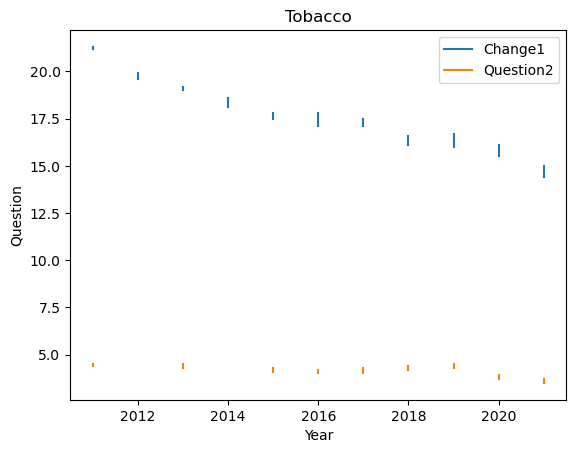

In [ ]:
#ploting 2 question on the same graph with YearEnd as the x axis
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
plt.xlabel('Year')
plt.ylabel('Question')
plt.title('Overarching Conditions')
plt.legend()

C:\Users\tyzwh\AppData\Local\Temp\ipykernel_32328\2962594156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)


<Axes: >

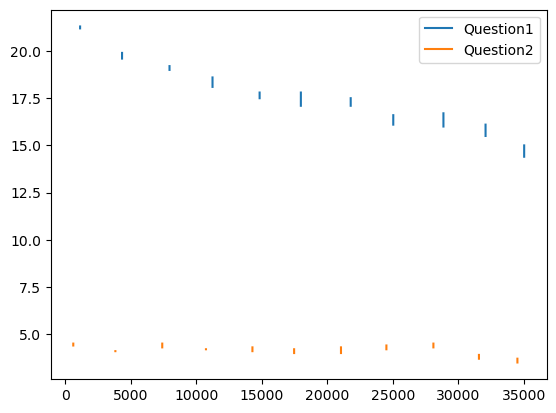

In [ ]:
#df['column_name'] = df['column_name'].astype(int)
question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)

question_year_filter[['Question1', 'Question2']].plot()



#question_year_filter.plot(y = 'Question1', 'Question2')


In [ ]:
us_overall_df =grouped_OverarchingConditions_df.loc[grouped_OverarchingConditions_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless Overarching Conditions use among adults aged >= 18 years'])].loc[grouped_OverarchingConditions_df['LocationAbbr'] == 'US']\
.loc[grouped_OverarchingConditions_df['StratificationCategory1'] == 'Overall']

us_overall_df.tail()


<Axes: title={'center': 'Question'}, xlabel='YearEnd', ylabel='DataValue'>

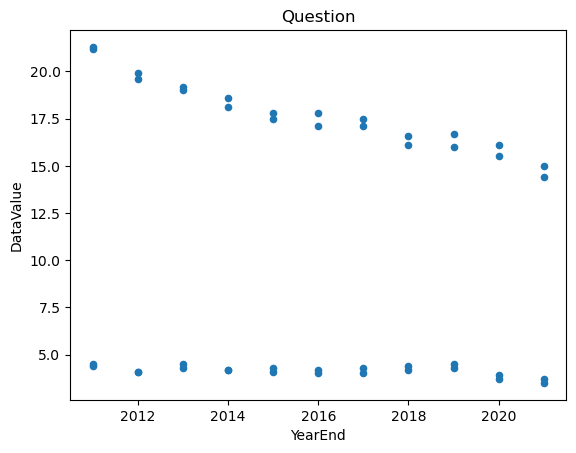

In [ ]:
us_overall_df.plot(kind = 'scatter', x='YearEnd', y= 'DataValue', title ='Question' )